Packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, gamma

Wishart matrix and Spiked Wishart matrices for some values of signal $s$: colormaps plots (single realization)

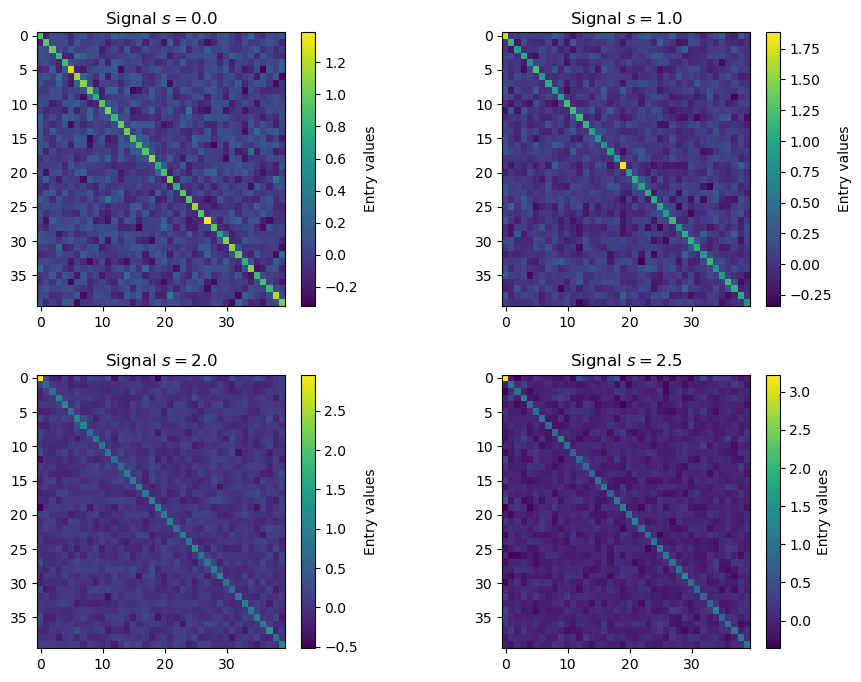

In [12]:
signals = [0., 1., 2., 2.5]

N=40
P=80

alpha = P/N

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.25)

cmap="viridis"

for i, signal in enumerate(signals):

    X = np.zeros((N, P))
    X[1:, :] = np.random.randn(N-1, P)
    X[0, :] = np.sqrt(1+signal)*np.random.randn(P)
    Wishart = np.dot(X, X.T) / P

    if i<2:
        im = axs[0, i].imshow(Wishart, cmap=cmap, aspect='auto', origin='upper')
        plt.colorbar(im, label="Entry values")
        axs[0, i].set_title("Signal $s="+str(signal)+"$")
    else:
        im = axs[1, i-2].imshow(Wishart, cmap=cmap, aspect='auto', origin='upper')
        plt.colorbar(im, label="Entry values")
        axs[1, i-2].set_title("Signal $s="+str(signal)+"$")

    

plt.show()

Spectrum of the Wishart matrix and the Spiked Wishart matrix for some values of sampling $\alpha=P/N$: colormaps plots (single realization)

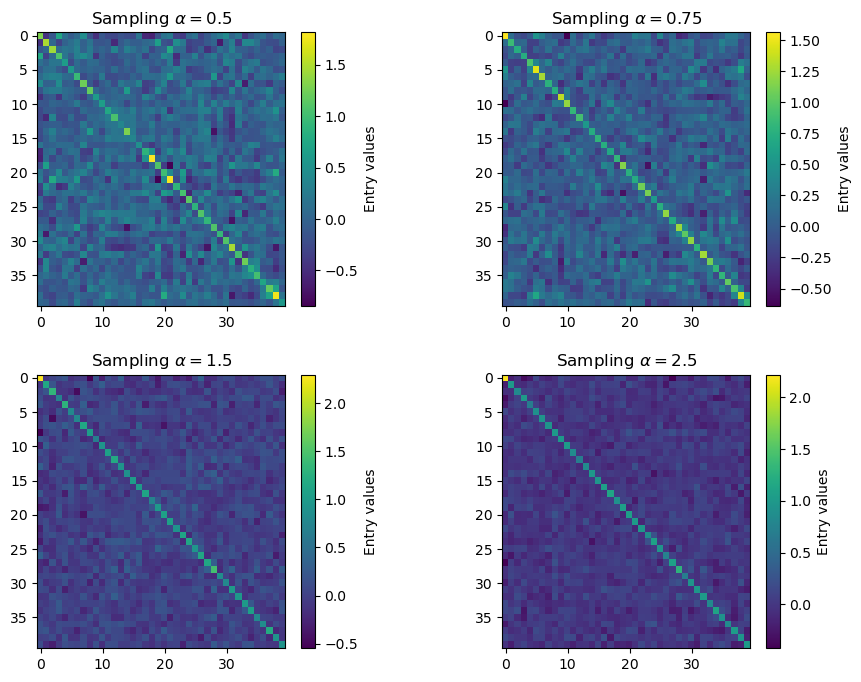

In [13]:
alphas = [0.5, 0.75, 1.5, 2.5]

signal = 1.

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.25)

cmap="viridis"

for i, alpha in enumerate(alphas):

    N=40
    P=np.int64(alpha*N+0.5)

    X = np.zeros((N, P))
    X[1:, :] = np.random.randn(N-1, P)
    X[0, :] = np.sqrt(1+signal)*np.random.randn(P)
    Wishart = np.dot(X, X.T) / P

    if i<2:
        im = axs[0, i].imshow(Wishart, cmap=cmap, aspect='auto', origin='upper')
        plt.colorbar(im, label="Entry values")
        axs[0, i].set_title("Sampling $\\alpha="+str(alpha)+"$")
    else:
        im = axs[1, i-2].imshow(Wishart, cmap=cmap, aspect='auto', origin='upper')
        plt.colorbar(im, label="Entry values")
        axs[1, i-2].set_title("Sampling $\\alpha="+str(alpha)+"$")

    

plt.show()

Spectrum of Wishart matrix and Spiked-Wishart matrices (single realization)

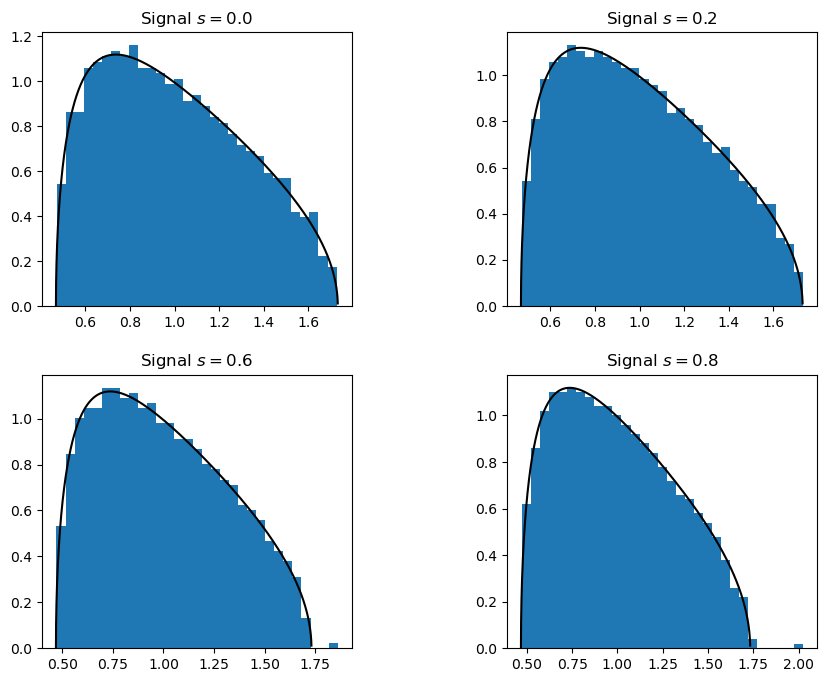

In [14]:
signals = [0., 0.2, 0.6, 0.8]

N=10**3
P=10**4

alpha = P/N

lm = (1-1/sqrt(alpha))**2
lp = (1+1/sqrt(alpha))**2

dl = (lp-lm)/10**4

x=np.arange(lm, lp, dl)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.25)

for i, signal in enumerate(signals):

    X = np.zeros((N, P))
    X[1:, :] = np.random.randn(N-1, P)
    X[0, :] = np.sqrt(1+signal)*np.random.randn(P)
    Wishart = np.dot(X, X.T) / P
    
    w, v =  np.linalg.eig(Wishart)
    if i<2:
        axs[0, i].hist(w, density="True", bins=np.int64(sqrt(N)))
        axs[0, i].set_title("Signal $s="+str(signal)+"$")
        axs[0, i].plot(x, alpha/(2*pi*x)*np.sqrt((lp-x)*(x-lm)), color="black")
    else:
        axs[1, i-2].hist(w, density="True", bins=np.int64(sqrt(N)))
        axs[1, i-2].set_title("Signal $s="+str(signal)+"$")
        axs[1, i-2].plot(x, alpha/(2*pi*x)*np.sqrt((lp-x)*(x-lm)), color="black")

plt.show()

Computation of largest eigenvalue and related eigenvector largest square component, for several values of sampling ratio $\alpha=\frac{P}{N}$. Average over 10 different realizations.

In [15]:
signal=1.0
N=100

alphas=np.array([100.0, 50.0, 20.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.75, 0.5, 0.25, 0.1])

lst = np.zeros(np.size(alphas))
rho = np.zeros(np.size(alphas))
lst_std = np.zeros(np.size(alphas))
rho_std = np.zeros(np.size(alphas))

for i, alpha in enumerate(alphas):

    P = np.int64(alpha*N+0.5)

    lsts = np.zeros((10, np.size(alphas)))
    rhos = np.zeros((10, np.size(alphas)))

    for s in range(10):

        X = np.zeros((N, P))
        X[1:, :] = np.random.randn(N-1, P)
        X[0, :] = np.sqrt(1+signal)*np.random.randn(P)
        Wishart = np.dot(X, X.T) / P
        
        w, v = np.linalg.eig(Wishart)

        lsts[s, i] = w[0]
        rhos[s, i] = v[0, 0]**2

    lst[i] = np.mean(lsts[:, i])
    rho[i] = np.mean(rhos[:, i])
    lst_std[i] = np.std(lsts[:, i])
    rho_std[i] = np.std(rhos[:, i])

    #print(alpha, (1+1/np.sqrt(alpha))**2, lst[i], lst_std[i], rho[i], rho_std[i])
    

/var/folders/7v/vhpc50yx54111jxh0__1dmhw0000gn/T/ipykernel_20180/4227196810.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  lsts[s, i] = w[0]
/var/folders/7v/vhpc50yx54111jxh0__1dmhw0000gn/T/ipykernel_20180/4227196810.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  rhos[s, i] = v[0, 0]**2


Plot of above

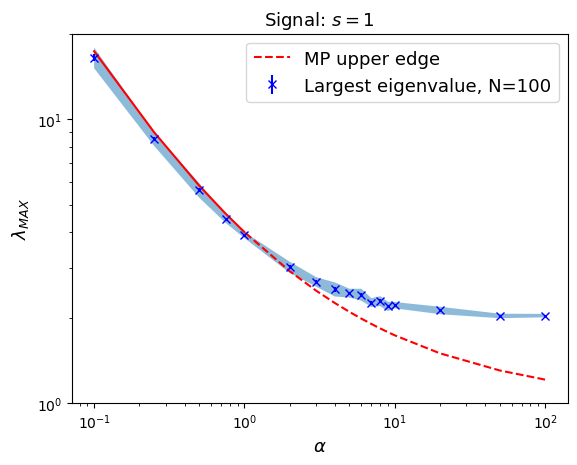

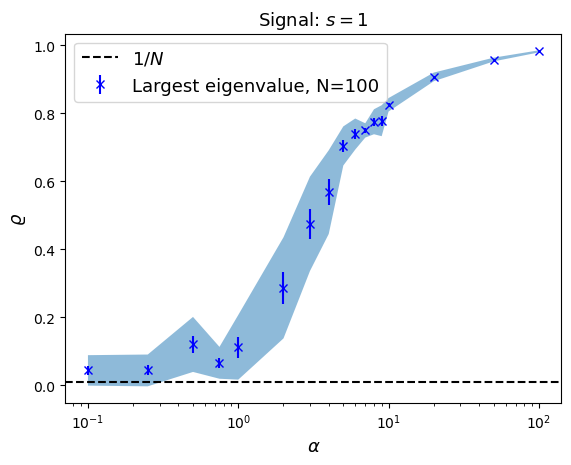

In [16]:
plt.xscale("log")
plt.yscale("log")

plt.xlabel("$ \\alpha $", fontsize=13)
plt.ylabel("$ \\lambda_{MAX} $", fontsize=13)

plt.ylim(bottom=1., top=20.)

alphas_r = alphas[alphas<=1]
alphas_s = alphas[alphas>=1]

plt.plot(alphas_r, (1+1/np.sqrt(alphas_r))**2, color="red")
plt.plot(alphas_s, (1+1/np.sqrt(alphas_s))**2, color="red", linestyle="dashed", label="MP upper edge")
plt.errorbar(alphas, lst, yerr=lst_std/np.sqrt(10), label='Largest eigenvalue, N=100', color="blue", fmt='x')
plt.fill_between(alphas, lst-lst_std, lst+lst_std, alpha=0.5)

#plt.plot(alphas_s, (signal+1)*(1+1/(signal*alphas_s)), color="black", label="Outlier Theory")

plt.legend(fontsize=13)
plt.title("Signal: $ s=1 $", fontsize=13)
#plt.grid(visible=True)

plt.show()

plt.xscale("log")
plt.yscale("linear")

plt.xlabel("$ \\alpha $", fontsize=13)
plt.ylabel("$ \\varrho $", fontsize=13)

alphas_r = alphas[alphas<=1]
alphas_s = alphas[alphas>=1]

#plt.plot(alphas_r, (1+1/np.sqrt(alphas_r))**2, color="red")
#plt.plot(alphas_s, (1+1/np.sqrt(alphas_s))**2, color="red", linestyle="dashed", label="MP upper edge")
plt.errorbar(alphas, rho, yerr=rho_std/np.sqrt(10), label='Largest eigenvalue, N=100', color="blue", fmt='x')
plt.fill_between(alphas, rho-rho_std, rho+rho_std, alpha=0.5)
plt.axhline(y=gamma(N/2)/(2*gamma(1+N/2)), color="black", linestyle="dashed", label="$1/N$")

#plt.plot(alphas_s, 1-1/(signal**2*alphas_s), color="black", label="Outlier Theory")

plt.legend(fontsize=13)
plt.title("Signal: $ s=1 $", fontsize=13)
#plt.grid(visible=True)

plt.show()

Same plots with theoretical curves

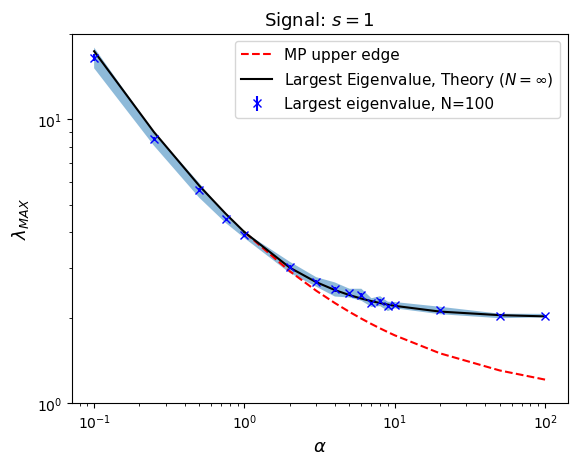

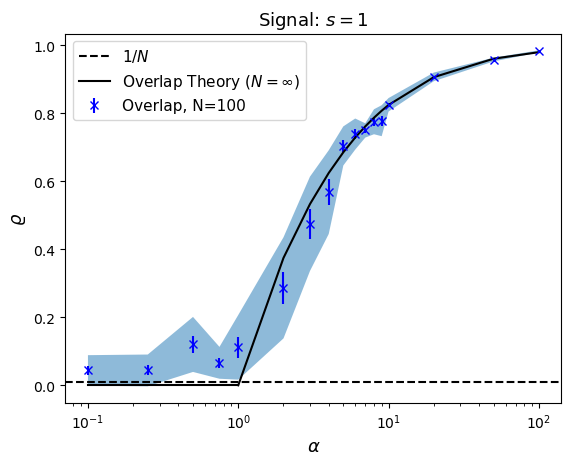

In [17]:
plt.xscale("log")
plt.yscale("log")

plt.xlabel("$ \\alpha $", fontsize=13)
plt.ylabel("$ \\lambda_{MAX} $", fontsize=13)

plt.ylim(bottom=1., top=20.)

alphas_r = alphas[alphas<=1]
alphas_s = alphas[alphas>=1]

plt.plot(alphas_r, (1+1/np.sqrt(alphas_r))**2, color="black")
plt.plot(alphas_s, (1+1/np.sqrt(alphas_s))**2, color="red", linestyle="dashed", label="MP upper edge")
plt.errorbar(alphas, lst, yerr=lst_std/np.sqrt(10), label='Largest eigenvalue, N=100', color="blue", fmt='x')
plt.fill_between(alphas, lst-lst_std, lst+lst_std, alpha=0.5)

plt.plot(alphas_s, (signal+1)*(1+1/(signal*alphas_s)), color="black", label="Largest Eigenvalue, Theory ($N=\\infty$)")

plt.legend(fontsize=11)
plt.title("Signal: $ s=1 $", fontsize=13)

plt.show()

plt.xscale("log")
plt.yscale("linear")

plt.xlabel("$ \\alpha $", fontsize=13)
plt.ylabel("$ \\varrho $", fontsize=13)

alphas_r = alphas[alphas<=1]
alphas_s = alphas[alphas>=1]

plt.errorbar(alphas, rho, yerr=rho_std/np.sqrt(10), label='Overlap, N=100', color="blue", fmt='x')
plt.fill_between(alphas, rho-rho_std, rho+rho_std, alpha=0.5)
plt.axhline(y=1/N, color="black", linestyle="dashed", label="$1/N$")

plt.plot(alphas_r, 0*alphas_r, color="black")
plt.plot(alphas_s, (1+signal*alphas_s)/(2+signal*alphas_s)*(1-1/(signal**2*alphas_s)), color="black", label="Overlap Theory ($N=\\infty$)")

plt.legend(fontsize=11, loc="upper left")
plt.title("Signal: $ s=1 $", fontsize=13)

plt.show()